In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 

In [2]:
import pandas as pd
df = pd.read_csv("../input/auto-mpg/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
mis_val= df[df['horsepower'].isnull()]
print(mis_val)

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


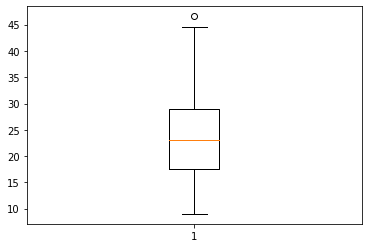

In [4]:
import matplotlib.pyplot as plt
X = df["mpg"]
plt.boxplot(X)
plt.show()

array([46.6])

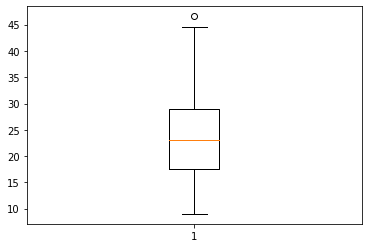

In [5]:
outliers = plt.boxplot(X[:, ])["fliers"][0].get_data()[1]
outliers

In [6]:
def find_outliers(df,col):
    quart1= df[col].quantile(0.25)
    quart3= df[col].quantile(0.75)
    IQR = quart3 - quart1
    low_val = quart1 - 1.5* IQR
    high_val = quart3 + 1.5* IQR
    df = df.loc[ (df[col]< low_val)|(df[col] > high_val) ]
    return df
outliers = find_outliers(df,"mpg")
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
